# OCR
 

## Imports

In [58]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import re
from os.path import exists
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import string


import letter_detection_utils as ld_util
import preprocessing as pp
import ressources as rss
import modele as mdl
import rendering as rd
import metric_orthograph as mo
import matplotlib.pyplot as plt


# initialisation des variables globales
rss.init()



In [54]:
# Pour recharger les libs pendant les devs
from importlib import reload 
reload(ld_util)
reload(pp)
reload(rss)
reload(mdl)
reload(rd)
reload(mo)

<module 'metric_orthograph' from 'd:\\GitHub\\OCRpyMAN\\notebooks\\metric_orthograph.py'>

# Full model

In [64]:
# Loads models

text_detection_model = mdl.load_text_detection_model()
text_reco_model = tf.keras.models.load_model("../pickle/tj_ctc_augmented_20epochs_LR-plateau", custom_objects={"CTCLoss": mdl.CTCLoss})


2023-02-24 12:34:48.890 INFO    root: Using downloaded & verified file: C:\Users\TiBo\.cache\doctr\models\db_resnet50-adcafc63.zip
2023-02-24 12:34:54.794 INFO    root: Using downloaded & verified file: C:\Users\TiBo\.cache\doctr\models\crnn_vgg16_bn-76b7f2c6.zip


2/2 [==============================] - 1s 522ms/step


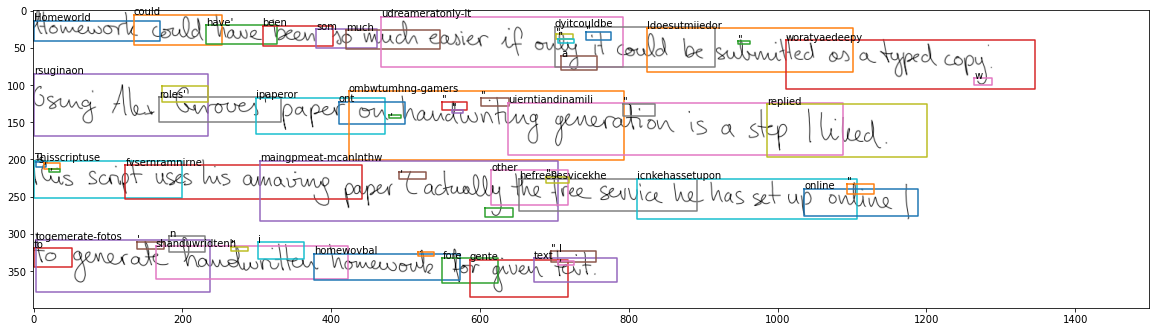

['Homeworld', 'could', "have'", 'been', 'som', 'much', 'udreameratonly-lt', 'dyitcouldbe', '"', '"', '"', 'ldoesutmiiedor', '"', 'woratyaedeepy', 'rsuginaon', 'a', 'w', "roles'", '', 'ipaperor', 'ont', 'ombwtumhng-gamers', ',', '"', '"', '"', 'uierntiandinamili', '".', 'replied', 'Thisscriptuse', "'s", ',', ',', 'fvsernramnirne', 'maingpmeat-mcanlnthw', ',', 'other', 'hefreesesvicekhe', '"n', 'icnkehassetupon', 'online', '".', '', 'to', 'togemerate-fotos', "'", 'shanduwridtenh', 'n', '"', 'i', 'homewovbal', '.', 'fore', 'gente', 'text', '".l', ',']


In [75]:
# Uses both models, chained

form_img_path = 'D:/tmp/test6.png'
text = mdl.make_ocr(text_detection_model, text_reco_model, form_img_path, with_display=True)
print(text)

4/4 [==============================] - 2s 460ms/step


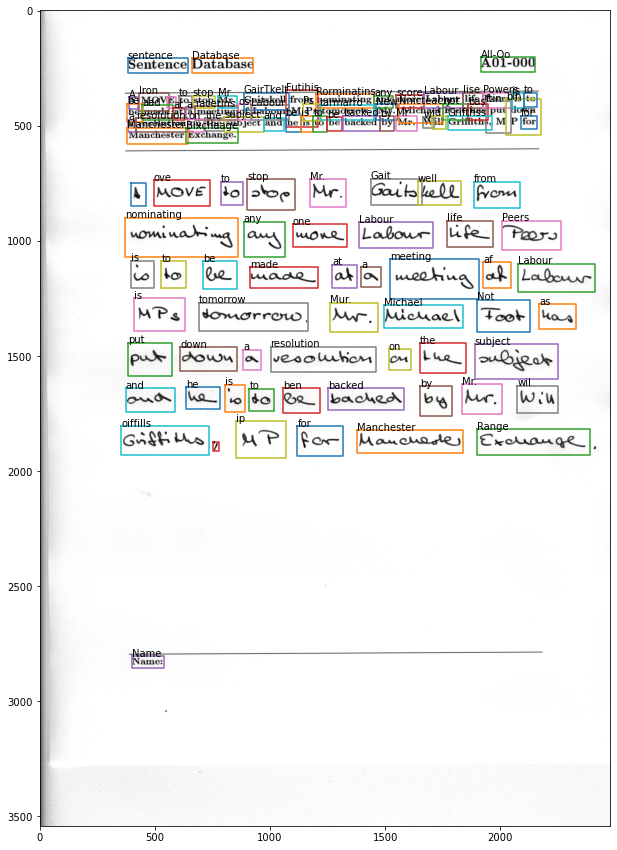

['sentence', 'Database', 'All-Oo', 'Futihis', 'A', 'Iron', '', 'to', 'stop', 'Mr', 'GairTkelt', 'Rorminatins', 'any', 'score', 'Labour', 'lise', 'Powers', 'ftin', 'bin', 'is', 'to', 'be', 'aad', 'at', 'a', 'racetins', 'os', 'Labour', 'Ps', 'tarmarro', 'New', 'Nnicteacly', 'not', 'bas', 'a', 'resolution', 'on', 'the', 'subject', 'and', 'be', 'is', 'to', 'be', 'backed', 'by', 'Mr', 'w', 'id', 'Grifthss', 'for', 'Manchester', 'Bixchaage', 'ove', 'to', 'stop', 'Mr.', 'Gait', 'well', 'from', '', 'nominating', 'any', 'one', 'Labour', 'life', 'Peers', 'is', 'to', 'be', 'meeting', 'af', 'Labour', 'made', 'at', 'a', 'is', 'tomorrow', 'Mur.', 'Michael', 'Not', 'as', 'put', 'the', 'subject', 'down', 'a', 'resolution', 'on', 'and', 'he', 'is', 'to', 'ben', 'backed', 'by', 'Mr.', 'wil', 'ip', 'oiffills', 'for', 'Manchester', 'Range', ',', 'Name']


In [53]:
form_img_path = '../data/formsA-D/a01-000u.png'
text = mdl.make_ocr(text_detection_model, text_reco_model, form_img_path, with_display=True)
print(text)